In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

sns.set()
%matplotlib inline

#loading batting csv into data frame
df = pd.read_csv("./Batting.csv")

# Column Header Key

Year -- The regular baseball season takes place from late March/early April to late September/early October, so the year column represents the year in which the regular season occured where the statistics were achieved

Tms -- The number of teams participating that season

#Bat -- Number of Players used in Games

R/G -- Runs Scored Per Game

G -- Games Played or Pitched

PA -- Plate Appearances When available, we use actual plate appearances from play-by-play game accounts. Otherwise estimated using AB + BB + HBP + SF + SH, which excludes catcher interferences.

AB -- At Bats

R -- Runs Scored/Allowed

H -- Hits/Hits Allowed

2B -- Doubles Hit/Allowed

3B -- Triples Hit/Allowed

HR -- Home Runs Hit/Allowed

RBI -- Runs Batted In

SB -- Stolen Bases

CS -- Caught Stealing

BB -- Bases on Balls/Walks

SO -- Strikeouts

BA -- Hits/At Bats For recent years, leaders need 3.1 Plate Appearances per team game played

OBP -- On-Base Percentage (H + BB + HBP)/(At Bats + BB + HBP + SF) For recent years, leaders need 3.1 Plate Appearances per team game played

SLG -- Slugging Percentage: Total Bases/At Bats or (1B + 22B + 33B + 4*HR)/AB For recent years, leaders need 3.1 Plate Appearances per team game played

OPS -- On-Base + Slugging Percentages. For recent years, leaders need 3.1 Plate Appearances per team game played

TB -- Total Bases (Singles + 2 x Doubles + 3 x Triples + 4 x Home Runs).

GDP -- Double Plays Grounded Into. Only includes standard 6-4-3, 4-3, etc. double plays, First tracked in 1933. For gamelogs only in seasons we have play-by-play, we include triple plays as well. All official seasonal totals do not include GITP's.

HBP -- Times Hit by a Pitch.

SH -- Sacrifice Hits (Sacrifice Bunts)

SF -- Sacrifice Flies, First tracked in 1954.

IBB -- Intentional Walks, First tracked in 1955.


In [4]:
#printing out the data set
df.head()

,Year,Tms,#Bat,BatAge,R/G,G,PA,AB,R,H,...,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB
0,2018,30,1270,28.1,4.45,4862,185139,165432,21630,41019,...,0.248,0.318,0.409,0.728,67733,3457.0,1922,823,1235.0,929.0
1,2017,30,1229,28.3,4.65,4860,185295,165567,22582,42215,...,0.255,0.324,0.426,0.750,70517,3804.0,1763,925,1168.0,970.0
2,2016,30,1247,28.4,4.48,4856,184580,165561,21744,42276,...,0.255,0.322,0.417,0.739,69106,3719.0,1651,1025,1214.0,932.0
3,2015,30,1252,28.4,4.25,4858,183628,165488,20647,42106,...,0.254,0.317,0.405,0.721,66953,3739.0,1602,1200,1232.0,951.0
4,2014,30,1212,28.5,4.07,4860,183929,165614,19761,41595,...,0.251,0.314,0.386,0.700,63988,3609.0,1652,1343,1277.0,985.0


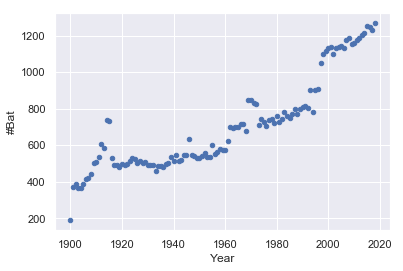

In [5]:
#represents the total number of players who stepped up to the plate in each season
df.plot.scatter(x='Year', y='#Bat')

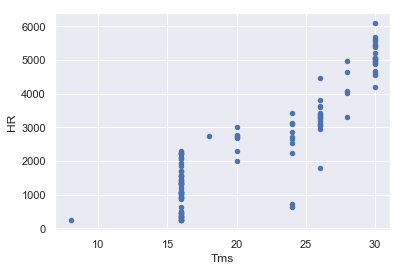

In [6]:
df.plot.scatter(x='Tms', y='HR')

In [11]:
df.describe()

,Year,Tms,#Bat,BatAge,R/G,G,PA,AB,R,H,...,BA,OBP,SLG,OPS,TB,GDP,HBP,SH,SF,IBB
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,...,119.000000,119.000000,119.000000,119.000000,119.000000,80.000000,119.000000,119.000000,65.000000,64.000000
mean,1959.000000,21.176471,708.193277,28.293277,4.396723,3326.168067,127243.731092,113259.663866,14647.016807,29583.747899,...,0.261899,0.328067,0.383067,0.711118,43948.352941,2874.212500,823.117647,1829.142857,1119.969231,1174.500000
std,34.496377,5.870996,255.549931,0.583637,0.436246,1004.735620,38644.287942,34454.721952,4804.292092,8877.838598,...,0.011912,0.012366,0.030413,0.039663,15610.955824,732.307532,458.002649,672.269698,257.790065,226.932407
min,1900.000000,8.000000,188.000000,26.800000,3.380000,1138.000000,43485.000000,39132.000000,5932.000000,10925.000000,...,0.237000,0.297000,0.305000,0.602000,14333.000000,1710.000000,312.000000,806.000000,616.000000,679.000000
25%,1929.500000,16.000000,512.000000,28.000000,4.110000,2471.000000,95211.000000,84395.500000,11049.500000,22021.000000,...,0.254000,0.320500,0.367500,0.688500,32477.000000,2142.500000,483.000000,1433.500000,883.000000,1013.250000
50%,1959.000000,18.000000,633.000000,28.400000,4.410000,2788.000000,105892.000000,94467.000000,12748.000000,25066.000000,...,0.260000,0.327000,0.389000,0.715000,36958.000000,3076.500000,717.000000,1624.000000,1221.000000,1229.500000
75%,1988.500000,26.000000,812.500000,28.600000,4.740000,4210.000000,160680.500000,143322.000000,18193.000000,37412.000000,...,0.267000,0.336500,0.401500,0.739000,55984.500000,3544.500000,893.500000,1941.000000,1301.000000,1354.000000
max,2018.000000,30.000000,1270.000000,29.700000,5.550000,4864.000000,190261.000000,167783.000000,24971.000000,45327.000000,...,0.296000,0.356000,0.437000,0.790000,73130.000000,3983.000000,1922.000000,4441.000000,1514.000000,1477.000000


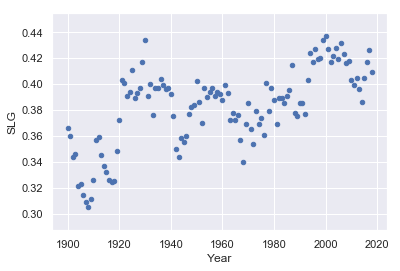

In [12]:
df.plot.scatter(x='Year',y='SLG')

The average Slugging percentage increased as the league expanded

Text(0,1,'Average Slugging Percentage and Number of Teams')

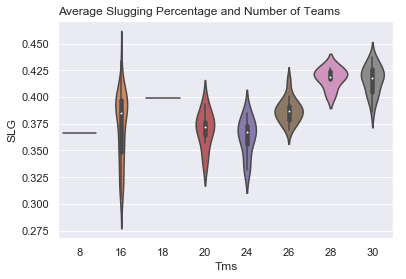

In [42]:
sns.violinplot(x='Tms', y='SLG', data=df)
plt.title("Average Slugging Percentage and Number of Teams", loc="left")

Text(0,1,'Average Home Runs and Number of Teams')

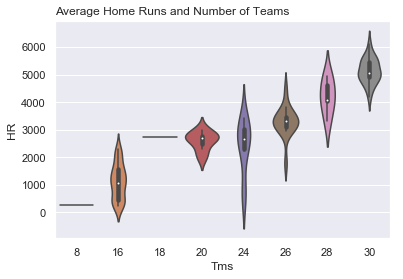

In [17]:
sns.violinplot(x='Tms', y='HR', data=df)
plt.title("Average Home Runs and Number of Teams", loc="left")

Text(0,1,'Batting average and Number of Teams')

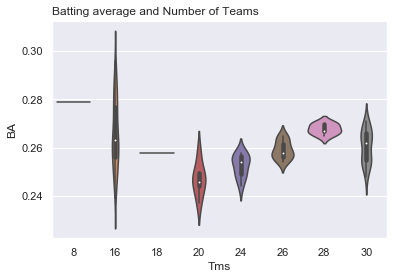

In [18]:
sns.violinplot(x='Tms', y='BA', data=df)
plt.title("Batting average and Number of Teams", loc="left")

In [44]:
df2 = df.copy()
model = 'SLG ~ %s'%(" + ".join(df2.columns.values[1:2]))
model

'SLG ~ Tms'

In [45]:
linear_regression = smf.ols(model, data = df2).fit()
linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SLG   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     40.24
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           4.39e-09
Time:                        22:27:22   Log-Likelihood:                 264.89
No. Observations:                 119   AIC:                            -525.8
Df Residuals:                     117   BIC:                            -520.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3276      0.009     36.094      0.000       0.310       0.346
Tms            0.0026      0.000      6.344      0.000       0.002       0.003
==============================================================================
Omnibus:                        4.781   Durbin-Watson:                   0.317
Prob(Omnibus):                  0.092   Jarque-Bera (JB):                4.855
Skew:                          -0.472   Prob(JB):                       0.0883
Kurtosis:                       2.706   Cond. No.                         82.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""